In [1]:
###IMPORT MODULES###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os

%matplotlib inline

### Data loading

In [2]:
# use Pandas to load the dataset
df = pd.read_excel("Online Retail.xlsx") 

### Initial data screening

In [3]:
# select a sample of 30 to preview the dataframe
df.sample(n=30, random_state=42) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom
465024,576200,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-11-14 12:14:00,2.95,15572.0,United Kingdom
477777,577076,22614,PACK OF 12 SPACEBOY TISSUES,12,2011-11-17 15:08:00,0.39,14362.0,United Kingdom
367855,568909,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,12,2011-09-29 13:38:00,1.25,16818.0,United Kingdom
491657,578072,21109,LARGE CAKE TOWEL CHOCOLATE SPOTS,1,2011-11-22 16:02:00,6.75,17759.0,United Kingdom
269641,560491,23297,SET 40 HEART SHAPE PETIT FOUR CASES,2,2011-07-19 10:51:00,1.65,12415.0,Australia


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# we can see some negative values
df.describe()     

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# number of customers
df.CustomerID.nunique()        

4372

In [9]:
print('No. of Unique StockCode: ', df.StockCode.nunique())
print('No. of Unique Descriptions: ', df.Description.nunique())

No. of Unique StockCode:  4070
No. of Unique Descriptions:  4223


What does this suggest?

### Data cleaning & preparation

In [10]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)       # or use df = df[~(df.CustomerID.isnull())]

In [11]:
df.shape

(406829, 8)

From above, we can see that there are negative values in both Quantity and UnitPrice, which could be due to cancelled/returned orders

In [12]:
# drop the negative transaction values
df['Amount'] = df.Quantity * df.UnitPrice

df = df[~(df.Amount < 0)]     # you can also try drop() method. 
df.shape

(397924, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
Amount         397924 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [14]:
df.to_excel('Retail_init_cleaned.xlsx', index=False)

### Preliminary data analysis
Now we have a relatively cleaner dataset to work with, let's consider the following excercise.

**Question:** What is the ranking of countries by sales?

In [15]:
#country ranking in terms of total number of transactions
df.Country.value_counts()  

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [16]:
 #ranking by total revenue
df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

Country
United Kingdom          7.308392e+06
Netherlands             2.854463e+05
EIRE                    2.655459e+05
Germany                 2.288671e+05
France                  2.090240e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.644395e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.343989e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Poland                  7.334650e+03
Israel                  7.221690e+03
Greece                  4.760520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
USA                     3.580390e+03
Malta                   2.7255

**Now, plot total revenue by country**

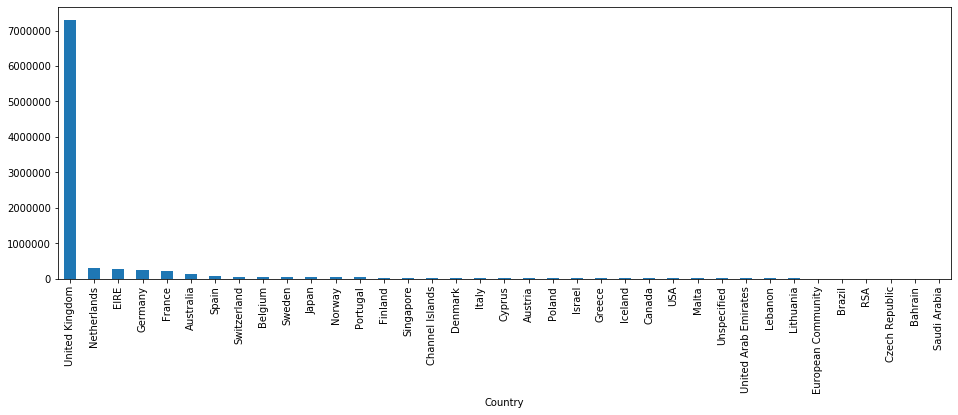

In [17]:
df.groupby('Country')['Amount'].sum().sort_values(ascending=False).plot('bar', figsize=(16,5));

It is clear to see that the UK dominates the sales.

In [18]:
df_country = df.groupby('Country',as_index=False)['Amount'].sum()
df_country.columns = ['Country', 'Total Amount']                 #Also, you can use rename to reset column names
df_country.sort_values(by='Total Amount', ascending=False, inplace=True)

In [19]:
df_country

,Country,Total Amount
35,United Kingdom,7.308392e+06
23,Netherlands,2.854463e+05
10,EIRE,2.655459e+05
14,Germany,2.288671e+05
13,France,2.090240e+05
0,Australia,1.385213e+05
30,Spain,6.157711e+04
32,Switzerland,5.644395e+04
3,Belgium,4.119634e+04
31,Sweden,3.837833e+04


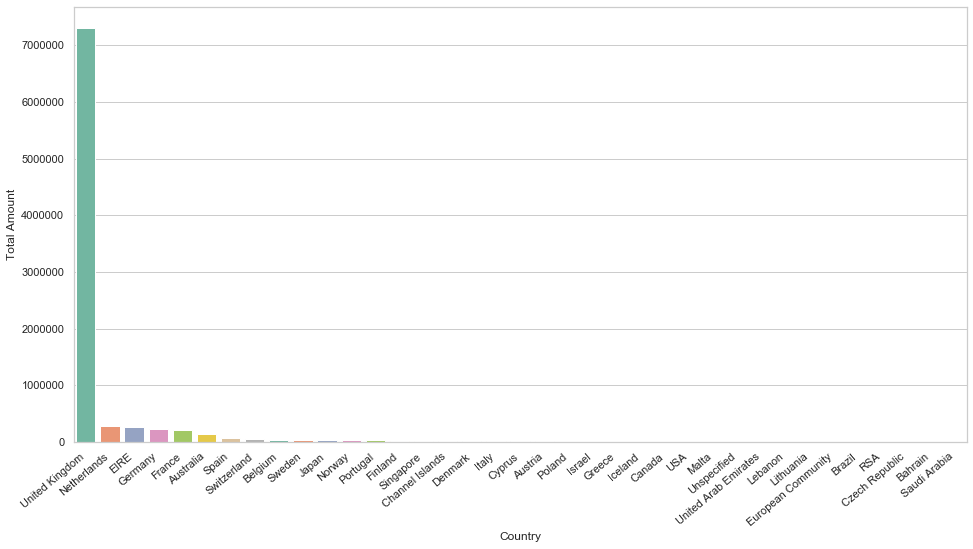

In [20]:
# plot a better looking image using seaborn
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x='Country', y='Total Amount',data=df_country,ax=ax, palette = "Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

**Question:** What are the top selling products?

In [21]:
# ranking by total selling quantity
top_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False) 

top_quantity[:20]  # Or you can use nlargest(20)      

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25345
PACK OF 60 PINK PAISLEY CAKE CASES    24264
BROCADE RING PURSE                    22963
VICTORIAN GLASS HANGING T-LIGHT       22433
ASSORTED COLOURS SILK FAN             21876
RED  HARMONICA IN BOX                 20975
JUMBO BAG PINK POLKADOT               20165
SMALL POPCORN HOLDER                  18252
LUNCH BAG RED RETROSPOT               17697
60 TEATIME FAIRY CAKE CASES           17689
Name: Quantity, dtype: int64

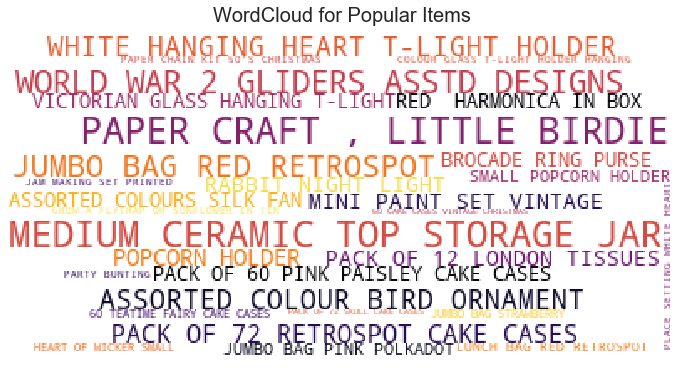

In [22]:
# try plotting a wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', max_words=30, colormap='inferno').generate_from_frequencies(top_quantity)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud for Popular Items', fontsize = 20);

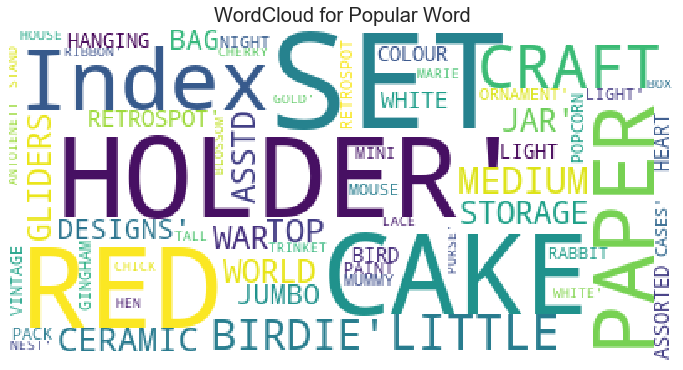

In [23]:
# try a different wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', max_words=60).generate(str(top_quantity.index))
#generate from text.
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('WordCloud for Popular Word', fontsize = 20);

In [24]:
# ranking by total revenue (i.e. total amount)
top_revenue = df.groupby('Description')['Amount'].sum().sort_values(ascending=False)

top_revenue.nlargest(20)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
CHILLI LIGHTS                          46286.51
PAPER CHAIN KIT 50'S CHRISTMAS         42660.83
PICNIC BASKET WICKER 60 PIECES         39619.50
BLACK RECORD COVER FRAME               39064.55
JUMBO BAG PINK POLKADOT                37289.59
DOORMAT KEEP CALM AND COME IN          35913.85
SPOTTY BUNTING                         35539.25
WOOD BLACK BOARD ANT WHITE FINISH      34478.01
SET OF 3 CAKE TINS PANTRY DESIGN       33347.80
JAM MAKING SET WITH JARS               32662.97
Name: Amount, dtype: float64

In [25]:
# convert Series to DataFrame
top_revenue = top_revenue.to_frame().reset_index()    
top20 = top_revenue[:20]
top20

,Description,Amount
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60
1,REGENCY CAKESTAND 3 TIER,142592.95
2,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
3,JUMBO BAG RED RETROSPOT,85220.78
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73
5,POSTAGE,77803.96
6,PARTY BUNTING,68844.33
7,ASSORTED COLOUR BIRD ORNAMENT,56580.34
8,Manual,53779.93
9,RABBIT NIGHT LIGHT,51346.20


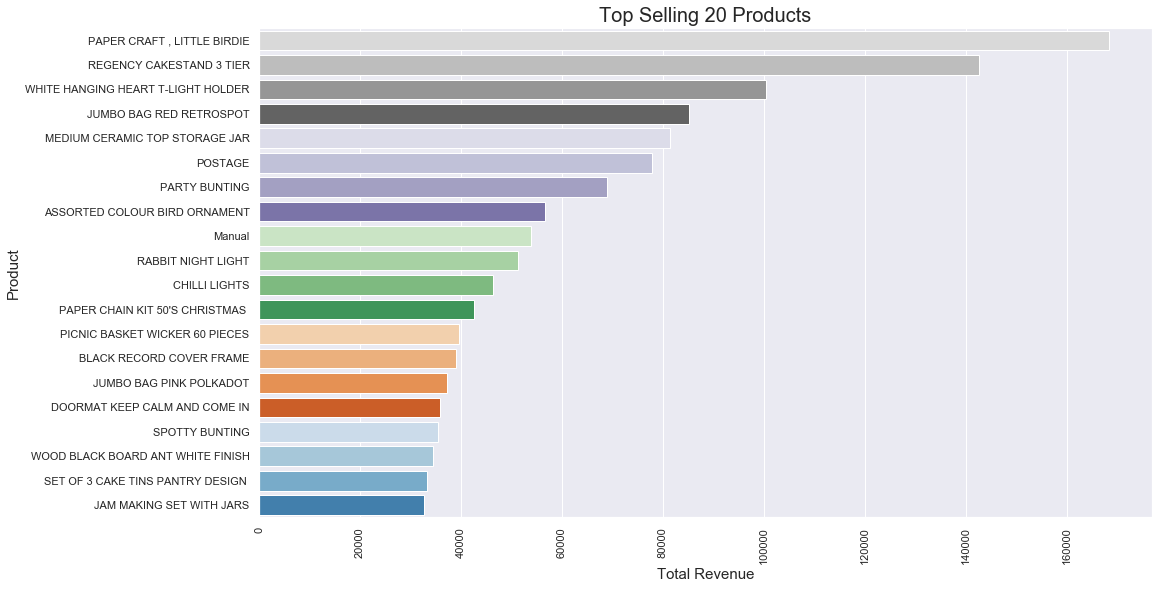

In [26]:
# plot topping selling products
sns.set() # set seaborn to default style

plt.figure(figsize = (16,9))
sns.barplot(x = top20.Amount, y = top20.Description, palette = "tab20c_r" )
plt.xticks(rotation = 90)
plt.xlabel("Total Revenue", fontdict={'fontsize': 15})
plt.ylabel("Product",fontdict={'fontsize': 15})
plt.title("Top Selling 20 Products", fontdict={'fontsize': 20});

---------------------------------------------------------------------------------------------------------------------

#### Excercise: 

- What are the top selling products in each country? are they the same in different countries?
- How to categorise the products/SKUs based on **ABC classifications** for inventory management?